In [ ]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [36]:
df = pd.read_csv('data/fcc-forum-pageviews.csv')
df.sort_values(by=['value', 'date'],inplace=True)

num_rows = int(0.025 * len(df))
top_items = df.tail(num_rows)
bottom_items = df.head(num_rows)

df = pd.concat([bottom_items,top_items])


In [37]:
df.head()

,date,value
0,2016-05-09,1201
2,2016-05-11,1716
1,2016-05-10,2329
7,2016-05-16,2591
6,2016-05-15,2927


In [38]:
df.describe()

,value
count,6.400000e+01
mean,1.467505e+05
std,2.147783e+05
min,1.201000e+03
25%,1.331700e+04
50%,1.007940e+05
75%,2.099770e+05
max,1.173655e+06


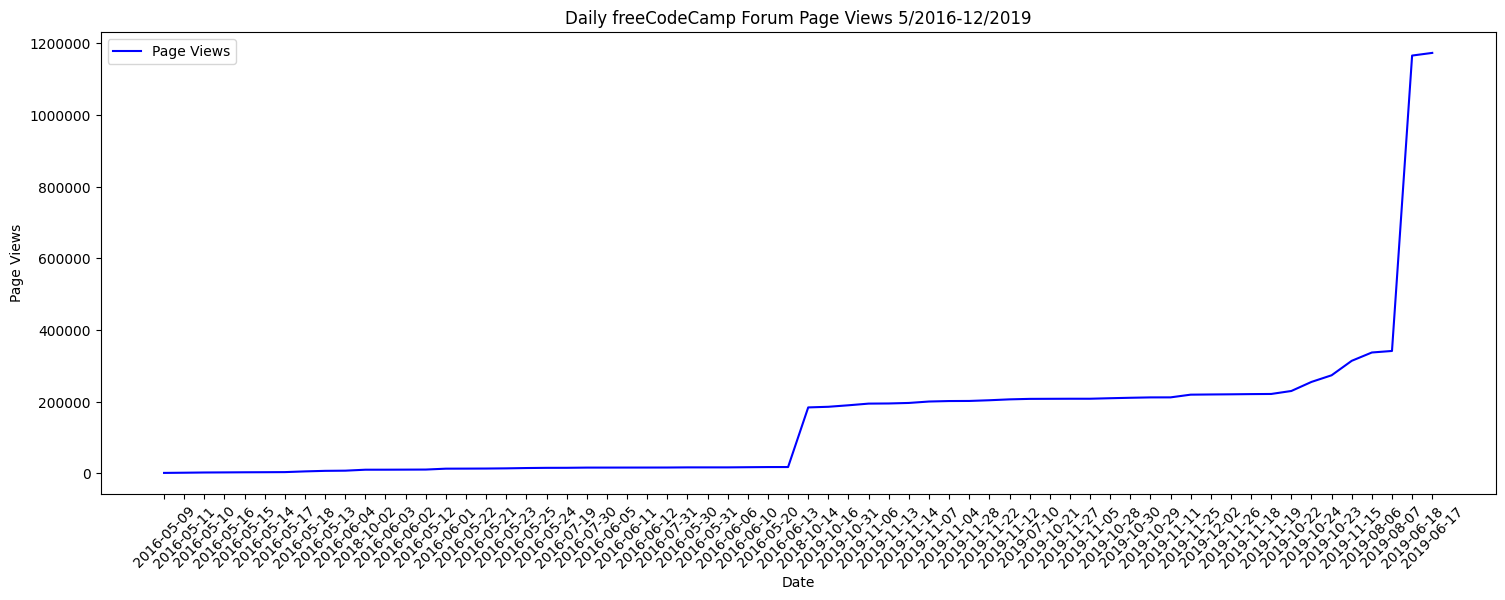

In [41]:
plt.figure(figsize=(18,6))
plt.plot(df['date'], df['value'], label='Page Views', color='b')

plt.title('Daily Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()

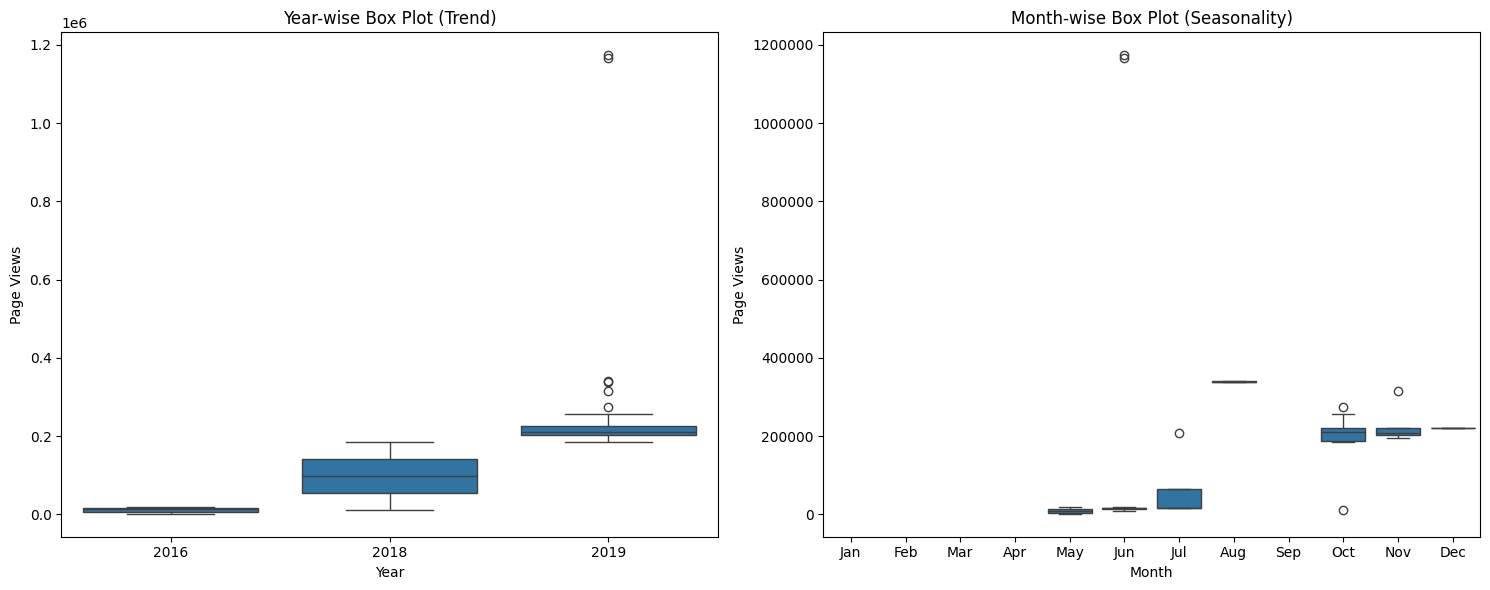

In [96]:
df_box = df.copy()
df_box['date'] = pd.to_datetime(df_box['date'])
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()